<a href="https://colab.research.google.com/github/ItalocOliveira/Analise_de_pacientes_ML/blob/main/analisePacientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importanto extensões
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Definindo seed para resultados reprodutíveis
np.random.seed(42)

In [ ]:
# Gerando dados simulados
num_pacientes = 1000
# Gerando idades aleatórias entre 18 e 80
idade = np.random.randint(18, 80, num_pacientes)
# Imc com distribuição normal centrada em 27 com desvio 4
imc = np.round(np.random.normal(loc=27, scale=4, size=num_pacientes), 1)
# Gerando pressão arterial entre 100 e 180 mmHg
pressao = np.random.randint(100, 180, size=num_pacientes)
# Gerando nivel de glicose entre 70 e 200 mg/dL
glicose = np.random.randint(70, 200, size=num_pacientes)
# Gerando colesterol entre 130 e 300 mg/dL
colesterol = np.random.randint(130, 300, size=num_pacientes)

In [ ]:
# Criando dataframe
df = pd.DataFrame({
    'paciente_id': [f'Paciente_{i+1}' for i in range(num_pacientes)],
    'idade': idade,
    'imc': imc,
    'pressao': pressao,
    'glicose': glicose,
    'colesterol': colesterol
})

In [ ]:
# Exibindo as primeiras linhas do DataFrame
df.head()

,paciente_id,idade,imc,pressao,glicose,colesterol
0,Paciente_1,36,41.0,121,183,233
1,Paciente_2,29,21.1,156,82,175
2,Paciente_3,25,36.0,126,84,173
3,Paciente_4,25,25.8,140,158,151
4,Paciente_5,78,26.7,179,91,243


In [ ]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('dadosDeSaude_data.csv', index=False)

In [ ]:
# Carregando os dados
df = pd.read_csv('dadosDeSaude_data.csv')

In [ ]:
# Pré-processamento dos dados
df_clean = df[['idade', 'imc', 'pressao', 'glicose', 'colesterol']].dropna()
# Criando scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Instanciando PCA
pca = PCA(n_components=2)
# Aplicando o PCA aos dados padronizados
data_pca = pca.fit_transform(data_scaled)

In [ ]:
# Utilizando o método do Cotovelo para encontrar o número ideal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

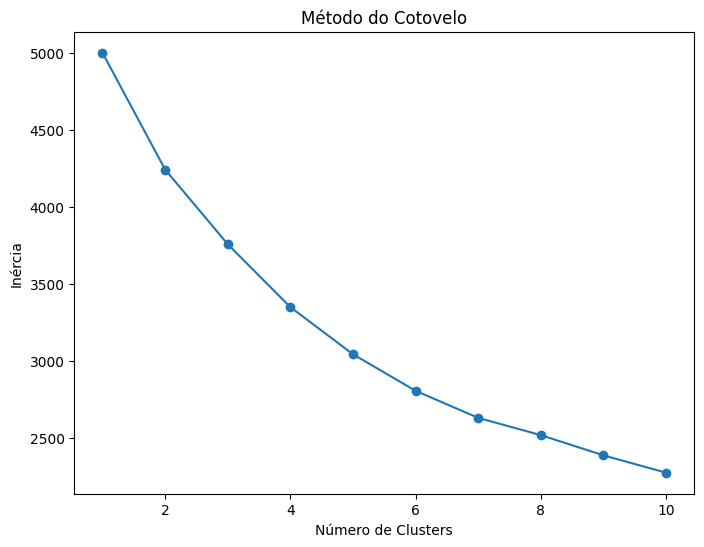

In [ ]:
# Plotando o gráfico do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [ ]:
# Aplicando K-Means com o número ideal de clusters (exemplo: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

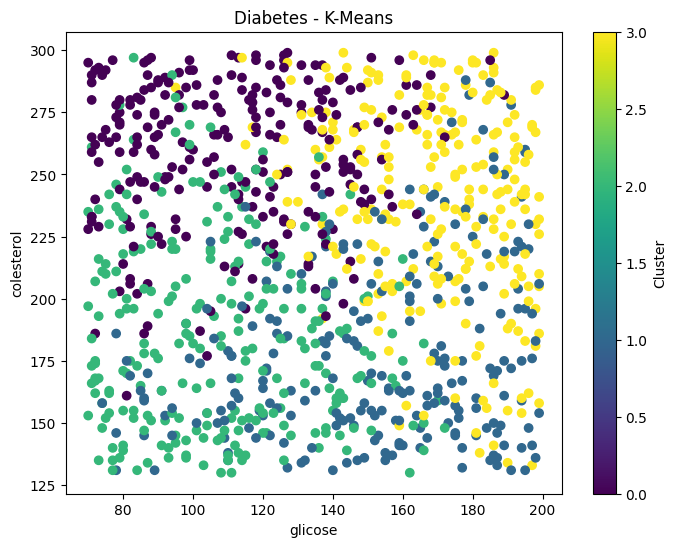

In [ ]:
# Visualizar os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['glicose'], df['colesterol'], c=df['cluster'], cmap='viridis')
plt.title('Diabetes - K-Means')
plt.xlabel('glicose')
plt.ylabel('colesterol')
plt.colorbar(label='Cluster')
plt.show()